In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Import models from scikit learn module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
df_housing = pd.read_csv('Housing.csv')

# Inspect the first few rows of the dataframe
print(df_housing.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
# Check for missing values
print(df_housing.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
# Handle categorical data: Convert 'yes'/'no' and 'furnished'/ 'semi-furnished'/'unfurnished' to numerical values
df_housing['mainroad'] = df_housing['mainroad'].map({'yes': 1, 'no': 0})
df_housing['guestroom'] = df_housing['guestroom'].map({'yes': 1, 'no': 0})
df_housing['basement'] = df_housing['basement'].map({'yes': 1, 'no': 0})
df_housing['hotwaterheating'] = df_housing['hotwaterheating'].map({'yes': 1, 'no': 0})
df_housing['airconditioning'] = df_housing['airconditioning'].map({'yes': 1, 'no': 0})
df_housing['prefarea'] = df_housing['prefarea'].map({'yes': 1, 'no': 0})
df_housing['furnishingstatus'] = df_housing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


In [9]:
# Define features (X) and target (y)
X = df_housing.drop(['price'], axis=1).values
y = df_housing['price'].values

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [11]:
# Select the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1256938194730.0925
R^2 Score: 0.6157842487789849


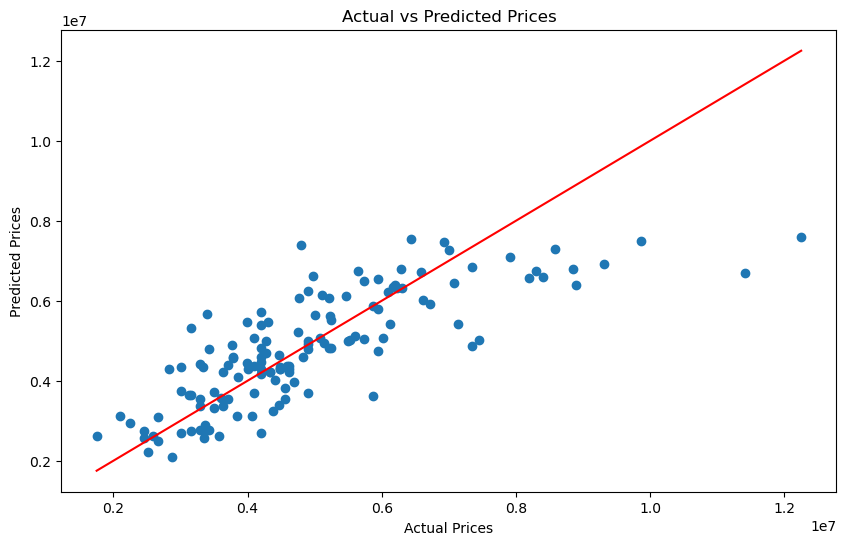

In [14]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

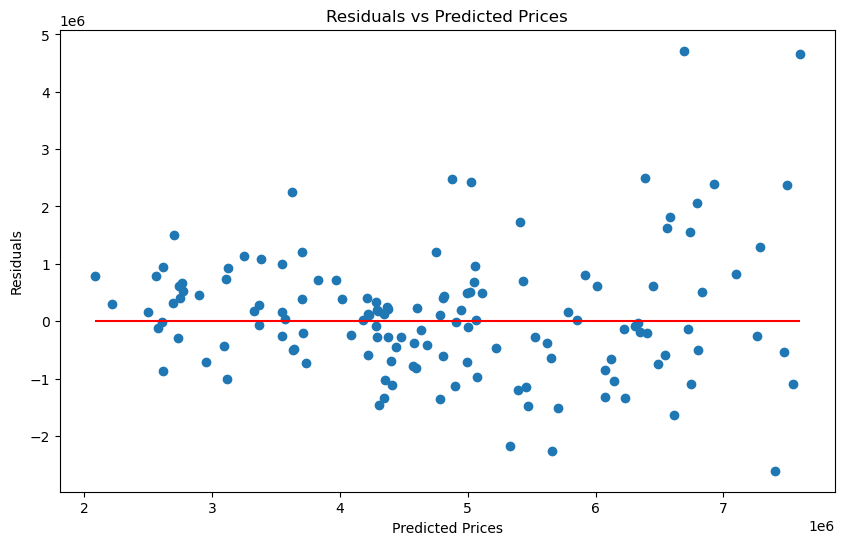

In [16]:
# Residual plot: Residuals vs Predicted Prices
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

In [18]:
# Make predictions with new data
new_data = [[7420, 2, 2, 1, 0, 1, 1, 3, 1, 2000, 3, 2]]  # Adjusted new data to have 15 features
predictions = model.predict(new_data)
print(f"Predicted Prices: {predictions}")

Predicted Prices: [5.67341187e+08]
